In [1]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.models import Model
from keras.layers import concatenate, Dense, Input, Flatten
from keras.optimizers import Adam

import sys
sys.path.append('../module/')

import gym2
from rl2.agents import eventDDPGAgent
from rl2.memory import SequentialMemory

Using TensorFlow backend.


In [2]:
# GymのPendulum環境を作成
dt = 0.005
env = gym2.make("Pendulum-v1", dt)
clip = 10.
env.max_torque, max_torque = clip, clip
env.action_space.high, env.action_space.low = max_torque, -max_torque

# 取りうる”打ち手”のアクション数と値の定義
nb_actios = 2
ACT_ID_TO_VALUE = {0: [-1], 1: [+1]}

In [3]:
def actor_net(a_shape, s_shape):
    action_input = Input(shape=(1,)+s_shape)
    x = Flatten()(action_input)
    x = Dense(16, activation="relu")(x)
    x = Dense(16, activation="relu")(x)
    x = Dense(3, activation="tanh")(x)
    actor = Model(inputs=action_input, outputs=x)
    return actor

def critic_net(a_shape , s_shape):
    action_input = Input(a_shape)
    observation_input = Input(shape=(1,)+s_shape)
    flattened_observation = Flatten()(observation_input)
    x = concatenate([action_input, flattened_observation])
    x = Dense(16, activation="relu")(x)
    x = Dense(16, activation="relu")(x)
    x = Dense(1, activation="linear")(x)
    critic = Model(inputs=[action_input, observation_input], outputs=x)
    return (critic, action_input)

In [4]:
def agent(a_shape, s_shape):
    actor = actor_net(a_shape, s_shape)
    critic,  critic_action_input = critic_net(a_shape, s_shape)
    memory = SequentialMemory(limit = 50000, window_length = 1)
    agent = eventDDPGAgent(
        a_shape[0],
        actor,
        critic,
        critic_action_input,
        memory,
        clip_com = 0.01
    )
    return agent

In [5]:
# agent compile
l = 0.5
episode_step = int(200 * 0.05 / dt)
time_mode = False
a = agent((3,), env.observation_space.shape)
a.compile(Adam(lr=0.001, clipnorm=1.), metrics=["mae"])

## 40000 steps, 2000 episode steps, l = 0.5

In [6]:
#a.load_weights('../learned_models_safe/40000_e2000_l05.h5')
a.test(env, nb_episodes=1, lam=l, visualize=0, nb_max_episode_steps=episode_step, action_view=0, time_mode=time_mode)

Testing for 1 episodes ...
core : a = [-1.0332556]
env : u = -1.0332555770874023
core : a = [-1.0332556]
env : u = -1.0332555770874023
core : a = [-1.0332556]
env : u = -1.0332555770874023
core : a = [-1.0332556]
env : u = -1.0332555770874023
core : a = [-1.0332556]
env : u = -1.0332555770874023
core : a = [-1.0332556]
env : u = -1.0332555770874023
core : a = [-1.0332556]
env : u = -1.0332555770874023
core : a = [-1.0332556]
env : u = -1.0332555770874023
core : a = [-1.0332556]
env : u = -1.0332555770874023
core : a = [-1.0691891]
env : u = -1.0691890716552734
core : a = [-1.0735327]
env : u = -1.0735327005386353
core : a = [-1.0775455]
env : u = -1.0775455236434937
core : a = [-1.0812314]
env : u = -1.0812313556671143
core : a = [-1.0845928]
env : u = -1.0845928192138672
core : a = [-1.0876329]
env : u = -1.0876328945159912
core : a = [-1.110975]
env : u = -1.1109750270843506
core : a = [-1.1348125]
env : u = -1.1348124742507935
core : a = [-1.1579187]
env : u = -1.1579186916351318
co

core : a = [-1.0786347]
env : u = -1.0786347389221191
core : a = [-1.1244873]
env : u = -1.124487280845642
core : a = [-10.]
env : u = -10.0
core : a = [-1.0624988]
env : u = -1.0624988079071045
core : a = [-1.1088126]
env : u = -1.1088125705718994
core : a = [-1.154541]
env : u = -1.154541015625
core : a = [-10.]
env : u = -10.0
core : a = [-1.0929453]
env : u = -1.0929453372955322
core : a = [-1.139147]
env : u = -1.1391470432281494
core : a = [-10.]
env : u = -10.0
core : a = [-1.0781535]
env : u = -1.0781534910202026
core : a = [-1.1247987]
env : u = -1.1247986555099487
core : a = [-10.]
env : u = -10.0
core : a = [-1.0643725]
env : u = -1.0643725395202637
core : a = [-1.1114343]
env : u = -1.1114343404769897
core : a = [-10.]
env : u = -10.0
core : a = [-1.0515435]
env : u = -1.0515434741973877
core : a = [-1.0989956]
env : u = -1.098995566368103
core : a = [-1.1458354]
env : u = -1.1458353996276855
core : a = [-10.]
env : u = -10.0
core : a = [-1.0862359]
env : u = -1.08623588085

core : a = [-2.49366706]
env : u = -2.4936670618668666
core : a = [-3.34570072]
env : u = -3.3457007210387646
core : a = [-2.47971588]
env : u = -2.479715883073279
core : a = [-3.31091511]
env : u = -3.310915106354272
core : a = [-2.46526344]
env : u = -2.465263439381019
core : a = [-3.27618911]
env : u = -3.2761891134252954
core : a = [-2.45031896]
env : u = -2.4503189590197887
core : a = [-3.24151487]
env : u = -3.241514871734581
core : a = [-2.43489141]
env : u = -2.434891414055731
core : a = [-3.20688485]
env : u = -3.206884849331329
core : a = [-2.41898953]
env : u = -2.4189895326662954
core : a = [-3.17229184]
env : u = -3.1722918415029397
core : a = [-2.40262181]
env : u = -2.4026218108543014
core : a = [-3.13772896]
env : u = -3.1377289599563247
core : a = [-2.38579652]
env : u = -2.3857965236294043
core : a = [-3.10318962]
env : u = -3.1031896224809996
core : a = [-2.36852174]
env : u = -2.3685217356827484
core : a = [-3.06866754]
env : u = -3.0686675430689094
core : a = [-2.3

core : a = [-2.631953]
env : u = -2.631953001022339
core : a = [-2.631953]
env : u = -2.631953001022339
core : a = [-2.631953]
env : u = -2.631953001022339
core : a = [-2.631953]
env : u = -2.631953001022339
core : a = [10.]
env : u = 10.0
core : a = [10.]
env : u = 10.0
core : a = [-2.6807806]
env : u = -2.6807806491851807
core : a = [-2.6807806]
env : u = -2.6807806491851807
core : a = [-2.6807806]
env : u = -2.6807806491851807
core : a = [-2.6807806]
env : u = -2.6807806491851807
core : a = [-2.6807806]
env : u = -2.6807806491851807
core : a = [-2.6807806]
env : u = -2.6807806491851807
core : a = [10.]
env : u = 10.0
core : a = [10.]
env : u = 10.0
core : a = [-2.7342749]
env : u = -2.7342748641967773
core : a = [-2.7342749]
env : u = -2.7342748641967773
core : a = [-2.7342749]
env : u = -2.7342748641967773
core : a = [-2.7342749]
env : u = -2.7342748641967773
core : a = [-2.7342749]
env : u = -2.7342748641967773
core : a = [-2.7342749]
env : u = -2.7342748641967773
core : a = [10.]

core : a = [-3.6270294]
env : u = -3.6270294189453125
core : a = [10.]
env : u = 10.0
core : a = [-3.6365721]
env : u = -3.6365721225738525
core : a = [10.]
env : u = 10.0
core : a = [-3.6466134]
env : u = -3.646613359451294
core : a = [10.]
env : u = 10.0
core : a = [-3.6575449]
env : u = -3.6575448513031006
core : a = [10.]
env : u = 10.0
core : a = [-3.6687806]
env : u = -3.668780565261841
core : a = [10.]
env : u = 10.0
core : a = [-3.680332]
env : u = -3.6803319454193115
core : a = [10.]
env : u = 10.0
core : a = [-3.692214]
env : u = -3.692214012145996
core : a = [10.]
env : u = 10.0
core : a = [-3.7044392]
env : u = -3.704439163208008
core : a = [10.]
env : u = 10.0
core : a = [10.]
env : u = 10.0
core : a = [-3.6883476]
env : u = -3.688347578048706
core : a = [10.]
env : u = 10.0
core : a = [-3.6968594]
env : u = -3.696859359741211
core : a = [10.]
env : u = 10.0
core : a = [-3.7066288]
env : u = -3.7066287994384766
core : a = [10.]
env : u = 10.0
core : a = [-3.7166815]
env : 

core : a = [3.40887796]
env : u = 3.4088779605319415
core : a = [4.35907164]
env : u = 4.3590716413356025
core : a = [3.41004851]
env : u = 3.4100485064271706
core : a = [4.33171253]
env : u = 4.33171253396849
core : a = [3.41051199]
env : u = 3.4105119923746803
core : a = [4.30464618]
env : u = 4.304646177305648
core : a = [3.41028886]
env : u = 3.410288859228275
core : a = [4.27785083]
env : u = 4.2778508299243185
core : a = [3.40939847]
env : u = 3.409398471107638
core : a = [4.25130581]
env : u = 4.2513058148243195
core : a = [3.40785918]
env : u = 3.4078591823236044
core : a = [4.22499146]
env : u = 4.224991456739055
core : a = [3.4056884]
env : u = 3.4056883995799727
core : a = [4.19888902]
env : u = 4.1988890239345915
core : a = [3.40290264]
env : u = 3.4029026398402853
core : a = [4.17298067]
env : u = 4.17298067413065
core : a = [3.39951758]
env : u = 3.399517584212266
core : a = [4.1472494]
env : u = 4.147249404212035
core : a = [3.39554813]
env : u = 3.3955481281692763
core 

core : a = [0.69906084]
env : u = 0.6990608398552001
core : a = [0.73075482]
env : u = 0.7307548193946005
core : a = [0.66368497]
env : u = 0.6636849713556062
core : a = [0.6943635]
env : u = 0.6943635023134371
core : a = [0.62823165]
env : u = 0.628231646359643
core : a = [0.65791829]
env : u = 0.6579182874637772
core : a = [0.59270455]
env : u = 0.5927045527447196
core : a = [0.62142234]
env : u = 0.6214223397417004
core : a = [0.55710739]
env : u = 0.5571073895844971
core : a = [0.58487885]
env : u = 0.5848788489621173
core : a = [0.52144387]
env : u = 0.5214438663771994
core : a = [0.54829103]
env : u = 0.5482910286662426
core : a = [0.4857177]
env : u = 0.4857177022581524
core : a = [0.51166211]
env : u = 0.511662114926944
core : a = [0.44993263]
env : u = 0.4499326251970055
core : a = [0.47499537]
env : u = 0.47499536515212065
core : a = [0.41409237]
env : u = 0.4140923711806334
core : a = [0.43829406]
env : u = 0.43829405688644874
core : a = [0.37820068]
env : u = 0.378200683382

core : a = [10.]
env : u = 10.0
core : a = [-3.028753]
env : u = -3.0287530422210693
core : a = [-3.0350037]
env : u = -3.035003662109375
core : a = [-3.0354772]
env : u = -3.0354771614074707
core : a = [-3.0354772]
env : u = -3.0354771614074707
core : a = [10.]
env : u = 10.0
core : a = [-3.048016]
env : u = -3.04801607131958
core : a = [-3.048016]
env : u = -3.04801607131958
core : a = [10.]
env : u = 10.0
core : a = [-3.0601368]
env : u = -3.0601367950439453
core : a = [-3.1163967]
env : u = -3.11639666557312
core : a = [10.]
env : u = 10.0
core : a = [-3.0926027]
env : u = -3.0926027297973633
core : a = [10.]
env : u = 10.0
core : a = [-3.0863934]
env : u = -3.086393356323242
core : a = [-3.1246367]
env : u = -3.124636650085449
core : a = [10.]
env : u = 10.0
core : a = [-3.101032]
env : u = -3.101032018661499
core : a = [-3.1587782]
env : u = -3.158778190612793
core : a = [10.]
env : u = 10.0
core : a = [-3.1367848]
env : u = -3.136784791946411
core : a = [-3.195379]
env : u = -3.

core : a = [10.]
env : u = 10.0
core : a = [10.]
env : u = 10.0
core : a = [-3.7941923]
env : u = -3.794192314147949
core : a = [10.]
env : u = 10.0
core : a = [-3.7978072]
env : u = -3.797807216644287
core : a = [10.]
env : u = 10.0
core : a = [-3.8016353]
env : u = -3.801635265350342
core : a = [10.]
env : u = 10.0
core : a = [-3.8059666]
env : u = -3.80596661567688
core : a = [10.]
env : u = 10.0
core : a = [-3.8129926]
env : u = -3.812992572784424
core : a = [10.]
env : u = 10.0
core : a = [10.]
env : u = 10.0
core : a = [-3.83839]
env : u = -3.8383901119232178
core : a = [10.]
env : u = 10.0
core : a = [-3.8409588]
env : u = -3.840958833694458
core : a = [10.]
env : u = 10.0
core : a = [-3.843795]
env : u = -3.84379506111145
core : a = [10.]
env : u = 10.0
core : a = [-3.8468938]
env : u = -3.846893787384033
core : a = [10.]
env : u = 10.0
core : a = [10.]
env : u = 10.0
core : a = [-3.8737514]
env : u = -3.873751401901245
core : a = [10.]
env : u = 10.0
core : a = [-3.8753405]
en

core : a = [4.89662363]
env : u = 4.896623627534856
core : a = [3.00843266]
env : u = 3.008432663581696
core : a = [4.8553628]
env : u = 4.85536280149235
core : a = [3.02453987]
env : u = 3.024539872932932
core : a = [4.81496363]
env : u = 4.814963627908069
core : a = [3.03941324]
env : u = 3.0394132428095078
core : a = [4.77537836]
env : u = 4.77537836114408
core : a = [3.05309742]
env : u = 3.053097421261817
core : a = [4.73656177]
env : u = 4.73656176905413
core : a = [3.06563463]
env : u = 3.0656346269039454
core : a = [4.69847097]
env : u = 4.698470972545111
core : a = [3.07706481]
env : u = 3.0770648063418724
core : a = [4.6610653]
env : u = 4.661065297388208
core : a = [3.08742578]
env : u = 3.0874257796946885
core : a = [4.62430614]
env : u = 4.624306137199375
core : a = [3.09675338]
env : u = 3.0967533752614553
core : a = [4.58815683]
env : u = 4.588156826618542
core : a = [3.10508155]
env : u = 3.1050815542776595
core : a = [4.55258252]
env : u = 4.5525825238128945
core : a =

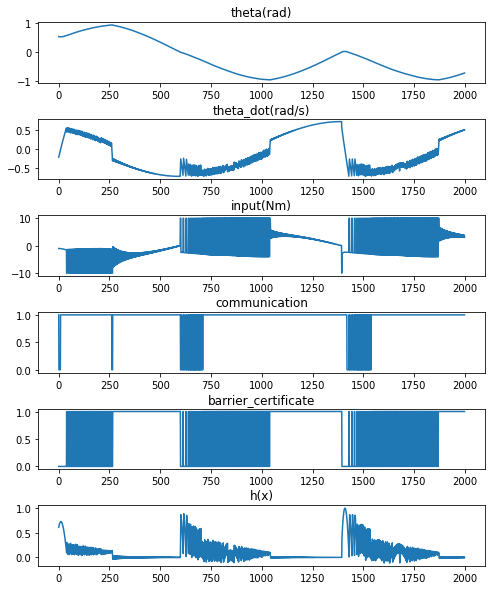

In [9]:
titles = ['theta(rad)', 'theta_dot(rad/s)', 'input(Nm)', 'communication', 'barrier_certificate', 'h(x)'] 
history = a.data_log[0]
x_axis = range(episode_step)
plt.figure(figsize=(8,10))
plt.subplots_adjust(wspace=0.4, hspace=0.6)
for i in range(history.shape[1]):
    data = history[:,i]
    plt.subplot(history.shape[1],1,i+1)
    plt.title(titles[i])
    plt.plot(x_axis, data)
plt.show()

## 600000 steps, 2000 episode steps, l = 0.5

In [21]:
a.load_weights('../learned_models_safe/600000_e2000_l05.h5')
a.test(env, nb_episodes=1, lam=l, visualize=0, nb_max_episode_steps=episode_step, action_view=0, time_mode=time_mode)

Testing for 1 episodes ...
Episode 1: reward: -157.103, steps: 2000


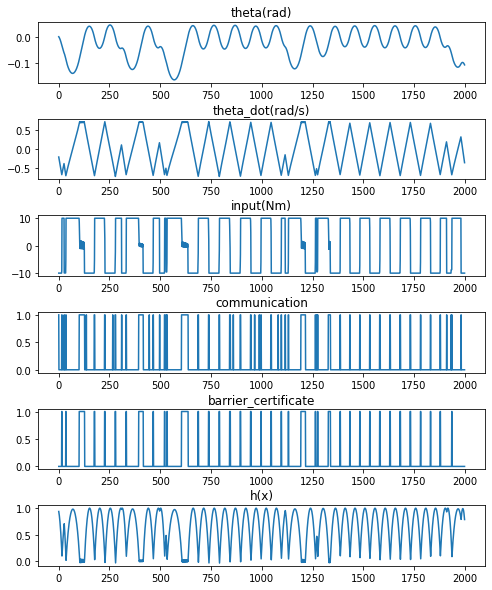

In [22]:
titles = ['theta(rad)', 'theta_dot(rad/s)', 'input(Nm)', 'communication', 'barrier_certificate', 'h(x)'] 
history = a.data_log[0]
x_axis = range(episode_step)
plt.figure(figsize=(8,10))
plt.subplots_adjust(wspace=0.4, hspace=0.6)
for i in range(history.shape[1]):
    data = history[:,i]
    plt.subplot(history.shape[1],1,i+1)
    plt.title(titles[i])
    plt.plot(x_axis, data)
plt.show()

## 600000 steps, 2000 episode steps, l = 0.5, pure_safe_RL

In [17]:
a.load_weights('../learned_models_safe/3000000_e2000_l05_pure.h5')
a.test(env, nb_episodes=1, lam=l, visualize=0, nb_max_episode_steps=episode_step, action_view=0, time_mode=time_mode)

Testing for 1 episodes ...
Episode 1: reward: -16455.361, steps: 2000


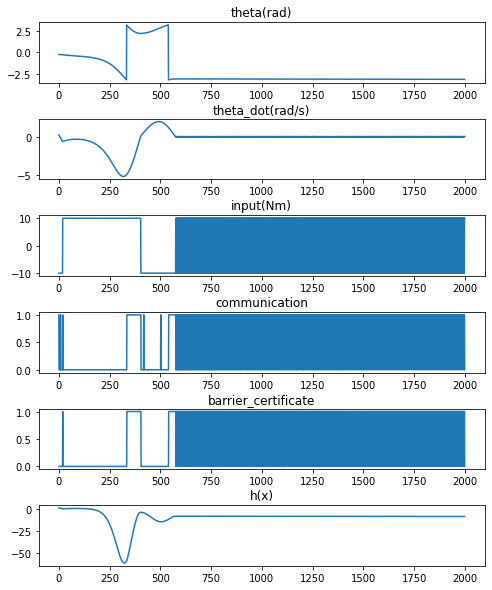

In [18]:
titles = ['theta(rad)', 'theta_dot(rad/s)', 'input(Nm)', 'communication', 'barrier_certificate', 'h(x)'] 
history = a.data_log[0]
x_axis = range(episode_step)
plt.figure(figsize=(8,10))
plt.subplots_adjust(wspace=0.4, hspace=0.6)
for i in range(history.shape[1]):
    data = history[:,i]
    plt.subplot(history.shape[1],1,i+1)
    plt.title(titles[i])
    plt.plot(x_axis, data)
plt.show()

In [14]:
# logの詳細な数字をみる
import csv

log = []
with open('../csv/learning_log.csv') as f:
    reader = csv.reader(f)
    for row in reader:
        log.append(row)
log = np.array(log).astype('float')

(600000, 2)


In [26]:
data = log[2000 * 51:2000*52-1]
print(np.min(data[:,0]))

-0.039418053380664175


## マイナスになってる!

In [26]:

print(np.mean(history[:,4]))

0.099
